In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
class FillSampler:
    def __init__ (self,loglikefunc, x0, dx, dchi=None):
        self.x0=x0
        self.N=len(x0)
        self.dx=dx
        if dchi is None:
            dchi = 20
        self.dlogl = dchi/2
        self.loglikefunc = loglikefunc

    def _toid(self,x):
        return tuple(np.floor(x/self.dx).astype(int),)
    
    def _getloglike(self,xid):
        x = self.dx*(xid+np.random.uniform(0,1,self.N))
        loglike = self.loglikefunc(x)
        if loglike>self.maxlike:
            self.maxlike=loglike
        return (loglike,x)

    def sample(self, verbose=0):
        tosample = set([self._toid(self.x0)])
        samples={}
        self.maxlike=-1e99
        self.evals=0
        self.steps=0
        while len(tosample)>0:
            if verbose>0:
                if (self.steps%verbose==0):
                    print ("Step: %i, evals: %i, to sample: %i, maxlike: %g"%
                       (self.steps,self.evals, len(tosample),self.maxlike))
            samp = [(xid,self._getloglike(xid)) for xid in tosample]
            if verbose>0:
                if (self.steps%verbose==0):
                    print ("thinking...")
            self.evals+=len(tosample)
            for xid,en in samp:
                samples[xid]=en
            tosample=set([])
            smax = self.maxlike-self.dlogl
            for xid,en in samp:
                ## get all the neighbours if good enough
                if (en[0]>smax):
                    for i in range(self.N):
                        for sign in [-1,+1]:
                            xidp=list(xid)
                            xidp[i]+=sign
                            xidp=tuple(xidp)                
                            if (xidp not in tosample) and (xidp not in samples):
                                tosample.add(xidp)
            self.steps+=1
        if verbose>0:
            print ("Done Step: %i, evals: %i, to sample: %i, maxlike: %g"%
                       (self.steps,self.evals, len(tosample),self.maxlike))

        self.samples = samples
        loglikes = [el[0] for el in samples.values()]
        weights = np.exp(loglikes-self.maxlike)
        samples = np.array([el[1] for el in samples.values()])
        return weights, samples
                
        

In [3]:

F=FillSampler(lambda x:-x[0]**2/2-x[1]**2-0.9*x[0]*x[1],np.array([0.5,0.5]),np.array([0.1,0.1]),dchi=10)
w,v=F.sample()
print (len(w),v.shape)

3085 (3085, 2)


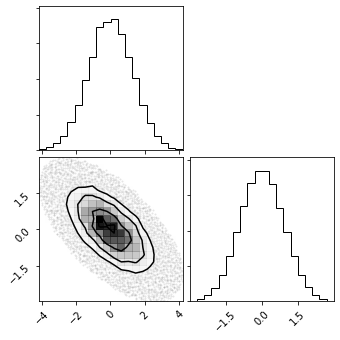

In [4]:
_=corner.corner(v,weights=w)

In [13]:
N=20
sig=np.random.uniform(1,3,N)
overhs2=1/(2*sig**2)
def tlike(x):
    return -(x**2*overhs2).sum()
F=FillSampler(tlike,np.random.uniform(-1,1,N),2*np.ones(N),dchi=2)
w,v=F.sample(verbose=1)

Step: 0, evals: 0, to sample: 1, maxlike: -1e+99
thinking...
Step: 1, evals: 1, to sample: 40, maxlike: -3.17637
thinking...
Step: 2, evals: 41, to sample: 219, maxlike: -3.17637
thinking...
Step: 3, evals: 260, to sample: 112, maxlike: -1.61943
thinking...
Step: 4, evals: 372, to sample: 75, maxlike: -1.61943
thinking...
Step: 5, evals: 447, to sample: 38, maxlike: -1.61943
thinking...
Step: 6, evals: 485, to sample: 38, maxlike: -1.61943
thinking...
Done Step: 7, evals: 523, to sample: 0, maxlike: -1.61943


In [17]:
F=FillSampler(tlike,np.random.uniform(-1,1,N),4.5*np.ones(N),dchi=25)
w2,v2=F.sample(verbose=1)

Step: 0, evals: 0, to sample: 1, maxlike: -1e+99
thinking...
Step: 1, evals: 1, to sample: 40, maxlike: -19.1431
thinking...
Step: 2, evals: 41, to sample: 756, maxlike: -18.1111
thinking...
Step: 3, evals: 797, to sample: 4550, maxlike: -10.4536
thinking...
Step: 4, evals: 5347, to sample: 21549, maxlike: -9.32424
thinking...
Step: 5, evals: 26896, to sample: 44200, maxlike: -6.15303
thinking...
Step: 6, evals: 71096, to sample: 99622, maxlike: -6.15303
thinking...
Step: 7, evals: 170718, to sample: 194917, maxlike: -5.74585
thinking...
Step: 8, evals: 365635, to sample: 358695, maxlike: -5.57016
thinking...
Step: 9, evals: 724330, to sample: 490279, maxlike: -4.74263
thinking...
Step: 10, evals: 1214609, to sample: 667866, maxlike: -4.74263
thinking...


KeyboardInterrupt: 

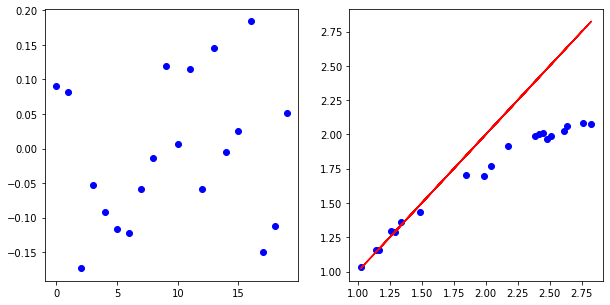

In [15]:
#vx=np.vstack((v,v2))
#wx=np.hstack((w,w2*2**N))
vx=v2
wx=w2
x,y=[],[]
for i in range(N):
    x.append((vx[:,i]*wx).sum()/wx.sum())
    y.append(np.sqrt((vx[:,i]**2*wx).sum()/wx.sum()))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x/sig,'bo')
plt.subplot(1,2,2)
plt.plot(sig,y,'bo')
plt.plot(sig,sig,'r-')

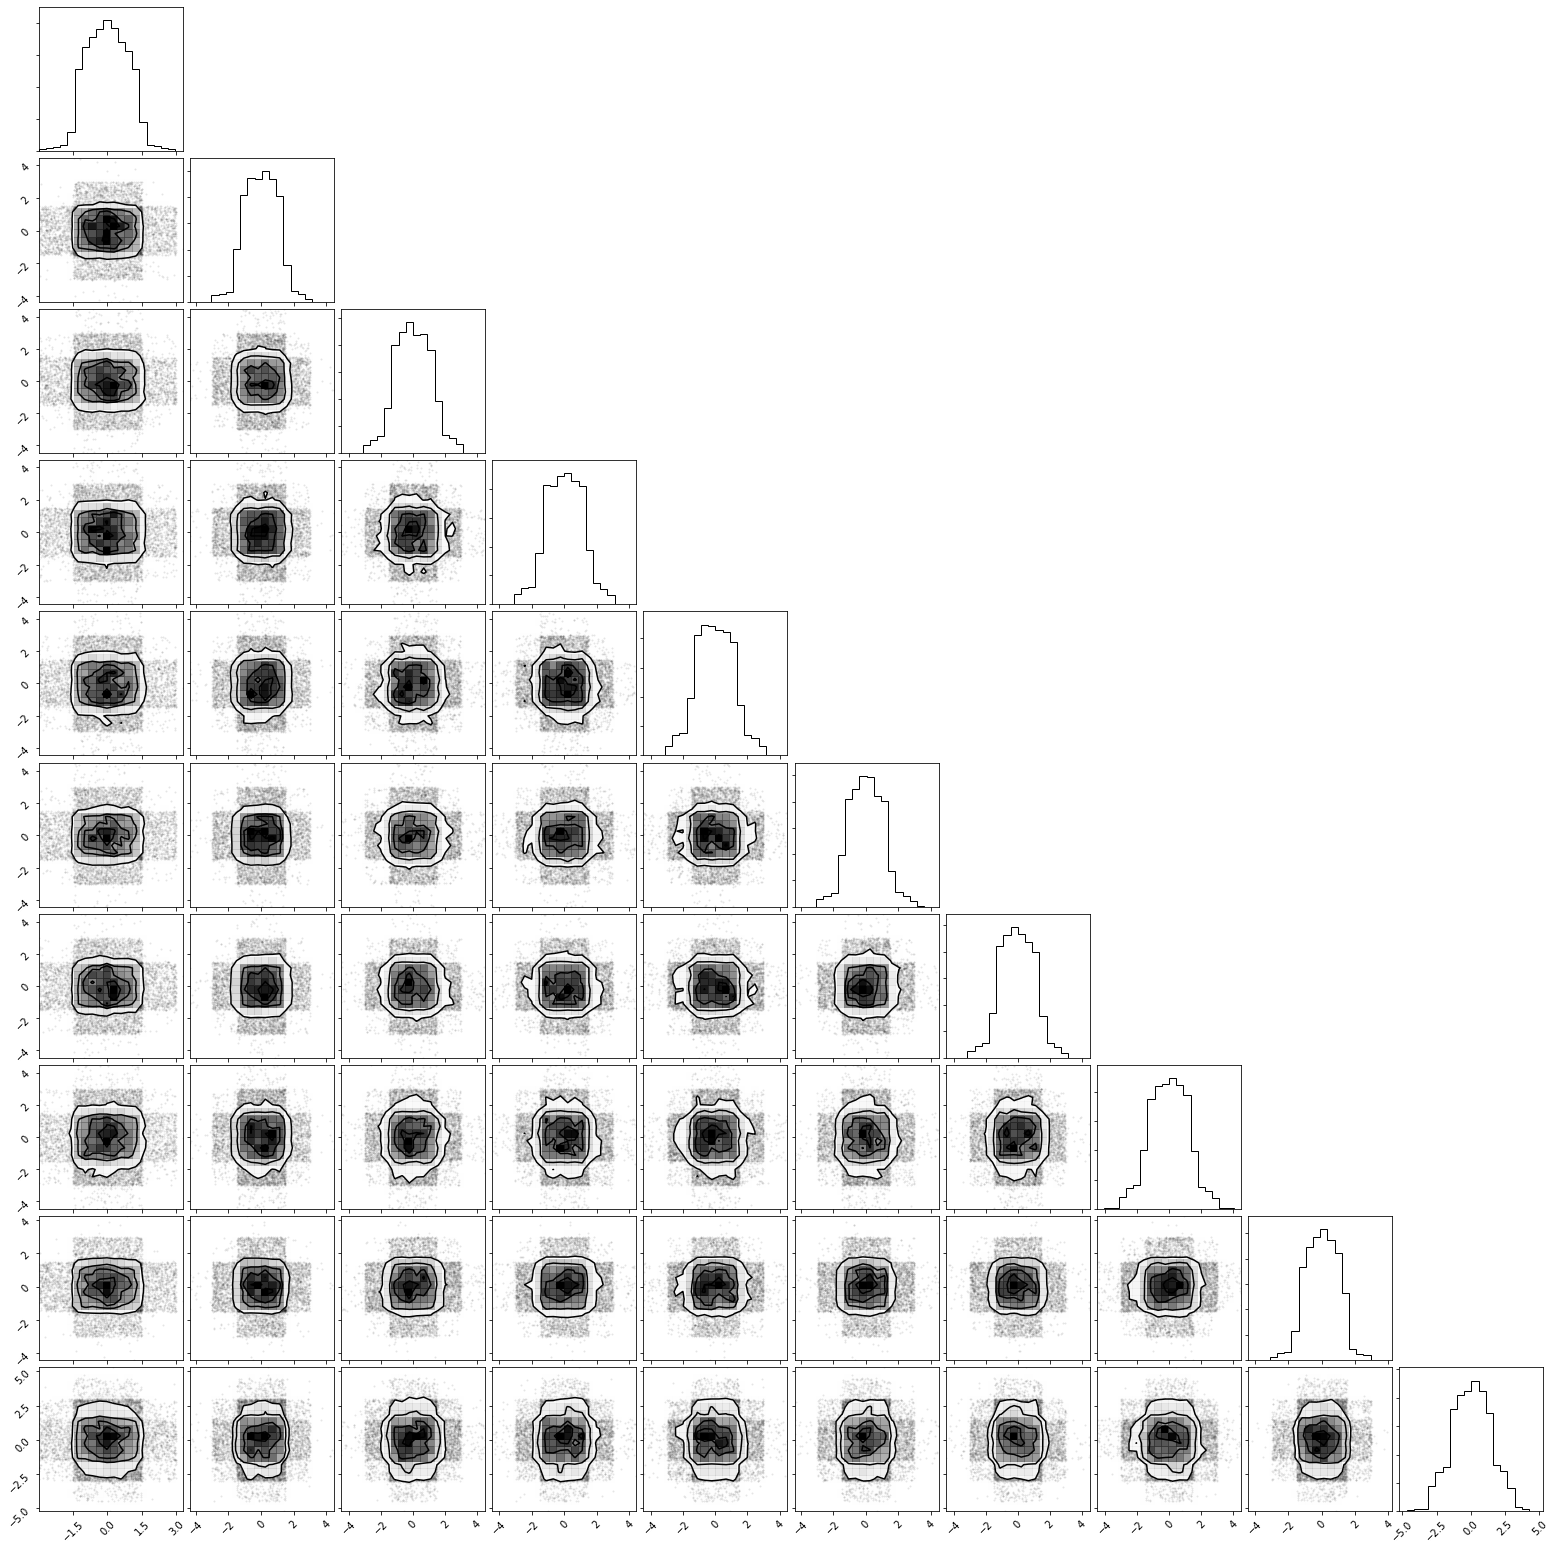

In [12]:
_=corner.corner(v,weights=w)